<a href="https://colab.research.google.com/github/mitesh20csu354/Reinforcement_learning/blob/main/UCB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Ads_Optimisation.csv')
df


,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [3]:
import random
N = 10000
d = 10
ads_selected = []
total_reward= 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = df.values[n, ad]
    total_reward = total_reward + reward
print(total_reward)
1256

1247


1256

In [5]:
pd.Series(ads_selected).tail(1000).value_counts(normalize=True)

3    0.117
2    0.109
9    0.108
4    0.102
8    0.102
0    0.099
6    0.093
5    0.092
7    0.092
1    0.086
dtype: float64

In [6]:
#Implementing UCB
import math
N = 10000
d = 10
ads_selected = []
number_of_selections = [0]*d
sum_of_reward = [0]*d
total_reward = 0

In [7]:
for n in range(10000):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if(number_of_selections[i] > 0):
            average_reward = sum_of_reward[i] / number_of_selections[i]
            delta_i = math.sqrt(2*math.log(n+1) / number_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    number_of_selections[ad] += 1
    reward = df.values[n, ad]
    sum_of_reward[ad] += reward
    total_reward += reward
print(total_reward)

2125


In [8]:
pd.Series(ads_selected).tail(1000).value_counts(normalize=True)

4    0.771
0    0.106
7    0.034
3    0.034
2    0.026
1    0.007
6    0.007
8    0.006
9    0.005
5    0.004
dtype: float64

Text(0, 0.5, 'Number of times each ad was selected by the selected by the algorithm')

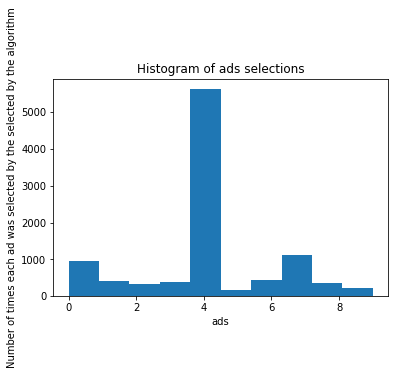

In [9]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('ads')
plt.ylabel('Number of times each ad was selected by the selected by the algorithm')